# Getting to know PySpark

## What is Spark?

Spark is a platform for cluster computing. Spark lets you spread data and computations over clusters with multiple nodes. Splitting up your data makes it easier to work with very large datasets because each node only works with a small amount of data.



## Using Spark in Python

The first step in using Spark is connecting to a cluster. Creating the connection is as simple as creating an instance of the SparkContext class. 

### Examining The SparkContext

In [ ]:
print(sc)

print(sc.version)

It takes more time to start up . Simple or small problems Spark may actually perform worse than some other solutions

### Using DataFrames

Spark's core data structure is the Resilient Distributed Dataset (RDD). This is a low level object that lets Spark work its magic by splitting data across multiple nodes in the cluster. However, RDDs are hard to work with directly, so in this course you'll be using the Spark DataFrame abstraction built on top of RDDs.

To start working with Spark DataFrames, you first have to create a SparkSession object from your SparkContext. You can think of the SparkContext as your connection to the cluster and the SparkSession as your interface with that connection.

Spark DataFrames has an advantage of being more optimized for complicated operations than RDDs.

### Creating a SparkSession

Use SparkSession.builder.getOrCreate() for it.

In [ ]:
from pyspark.sql import SparkSession

spark= SparkSession.builder.getOrCreate()

print(my_spark)

### Viewing tables


SparkSession has an attribute called catalog which lists all the data inside the cluster. One of the most useful is the .listTables() method, which returns the names of all the tables in your cluster as a list.

In [ ]:
print(spark.catalog.listTables())

### Are you query-ious?


You can run SQL queries on the tables in your Spark cluster. Use the DataFrame method .show() to print the results.

### Pandafy a Spark DataFrame


Queries that are run on huge dataset and aggregated it down to something a little more manageable. Sometimes it makes sense to then take that table and work with it locally using a tool like pandas. Spark DataFrames make that easy with the .toPandas() method. Calling this method on a Spark DataFrame returns the corresponding pandas DataFrame.

In [ ]:
query = "SELECT origin, dest, COUNT(*) as N FROM flights GROUP BY origin, dest"
flight_counts = spark.sql(query)
pd_counts = flight_counts.toPandas()
print(pd_counts.head())

### Put some Spark in your data


put a pandas DataFrame into a Spark cluster. The SparkSession class has a method for this as well. The .createDataFrame() method takes a pandas DataFrame and returns a Spark DataFrame. The output of this method is stored locally, not in the SparkSession catalog. This means that you can use all the Spark DataFrame methods on it.

To access the data in this way, you have to save it as a temporary table. You can do this using the .createTempView() Spark DataFrame method, which takes as its only argument the name of the temporary table you'd like to register. This method registers the DataFrame as a table in the catalog, but as this table is temporary, it can only be accessed from the specific SparkSession used to create the Spark DataFrame. There is also the method .createOrReplaceTempView(). This safely creates a new temporary table if nothing was there before, or updates an existing table if one was already defined. 

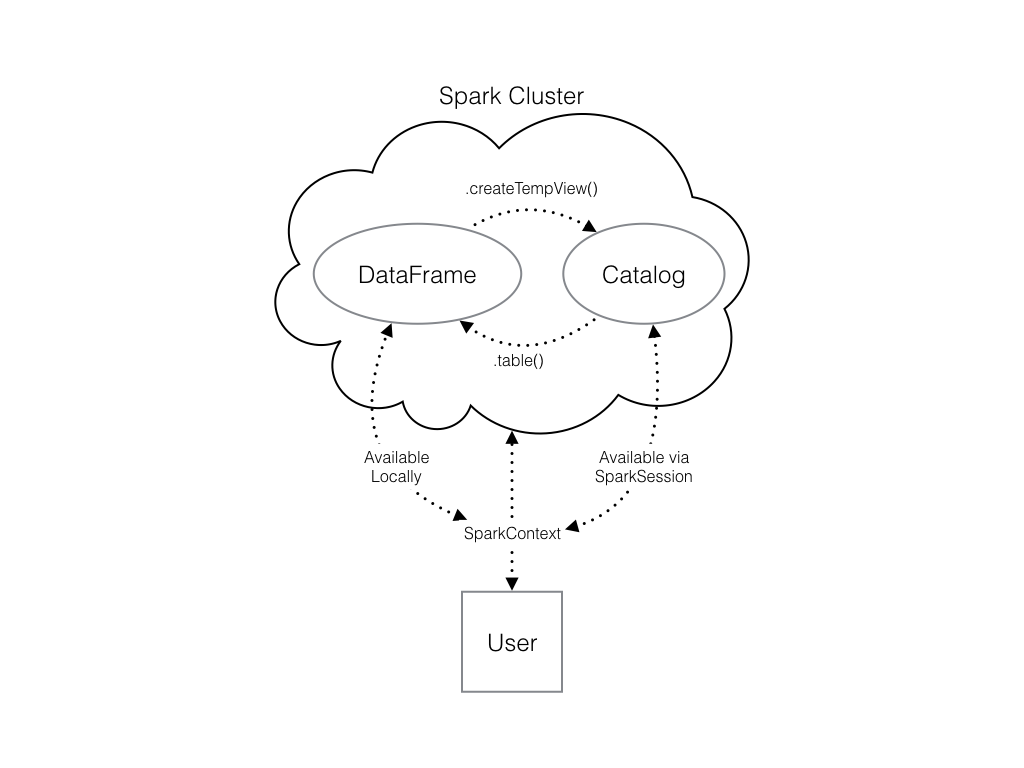

In [9]:
import pandas as pd
import numpy as np
pd_temp = pd.DataFrame(np.random.random(10))

spark_temp = spark.createDataFrame(pd_temp)
print(spark.catalog.listTables())

spark_temp.createOrReplaceTempView("temp")
print(spark.catalog.listTables())

### Dropping the middle man

Reading CSV files instead using pandas DataFrames.

In [16]:
# from urllib.request import urlretrieve
# url = "https://assets.datacamp.com/production/repositories/1237/datasets/6e5c4ac2a4799338ba7e13d54ce1fa918da644ba/airports.csv"
# airports = urlretrieve(url,"airports.csv")

In [ ]:
file_path = "airports.csv"
airports = spark.read.csv(file_path, header=True)
airports.show()